<a href="https://colab.research.google.com/github/jfvmgit/jimTelecomX2/blob/main/TelecomX2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [32]:
import pandas as pd
import json

# Cargar el archivo JSON original
with open("TelecomX_Data.json", "r") as file:
    data = json.load(file)


#🔧 Transformación

In [33]:
import pandas as pd
import json

# Cargar el archivo JSON original
with open("TelecomX_Data.json", "r") as file:
    data = json.load(file)

# Normalizar datos (aplanar estructuras anidadas)
df = pd.json_normalize(data)

print("✅ Datos normalizados:")
print(df.head())

# Ahora sí, buscar duplicados
duplicados = df.duplicated().sum()
print(f"\n🔍 Registros duplicados: {duplicados}")

if duplicados > 0:
    df = df.drop_duplicates()
    print("✅ Duplicados eliminados")

✅ Datos normalizados:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet

In [34]:
# 1️⃣ Revisar valores nulos
print("🔍 Valores nulos por columna:")
print(df.isnull().sum())

# 2️⃣ Asegurar que las columnas numéricas estén en formato float
columnas_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3️⃣ Verificar de nuevo después de conversión
print("\n📌 Tipos de datos después de conversión:")
print(df.dtypes)

# 4️⃣ Eliminar filas con datos numéricos nulos críticos
df = df.dropna(subset=columnas_numericas)

print("\n✅ Transformación completa. Datos listos para EDA.")


🔍 Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

📌 Tipos de datos después de conversión:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.P

#📊 Carga y análisis

/tmp/ipython-input-3617809564.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="pastel")


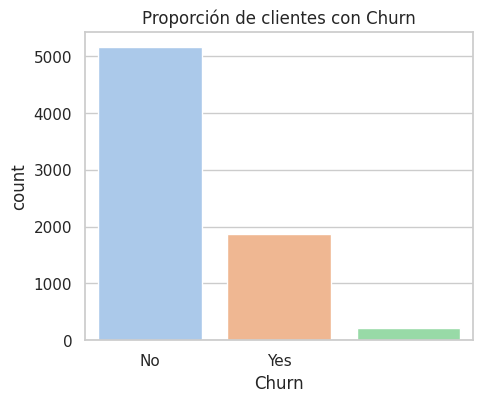

/tmp/ipython-input-3617809564.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="customer.tenure", data=df, palette="pastel")


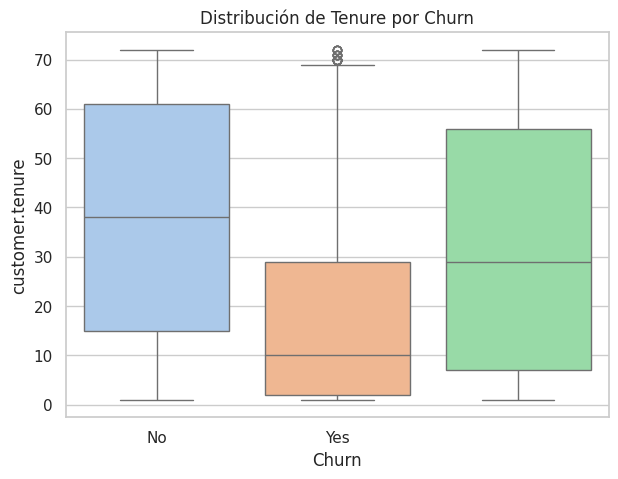

/tmp/ipython-input-3617809564.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="account.Charges.Monthly", data=df, palette="pastel")


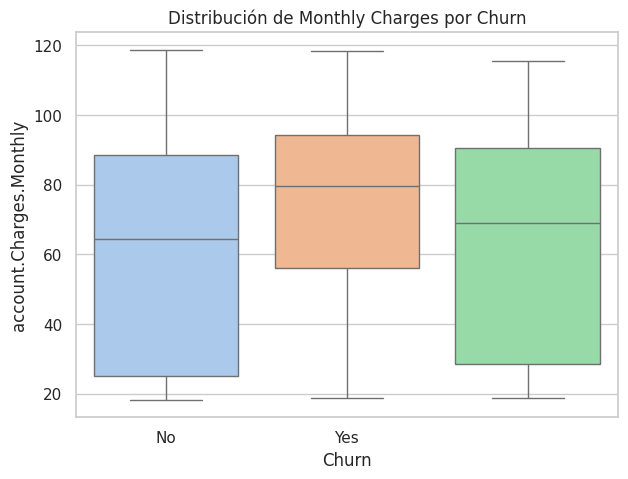

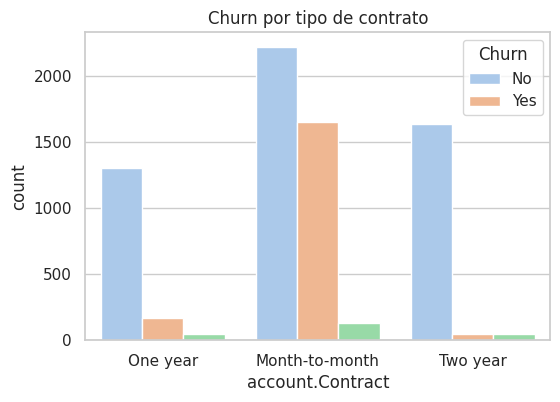

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

# 1️⃣ Proporción de churn
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df, palette="pastel")
plt.title("Proporción de clientes con Churn")
plt.show()

# 2️⃣ Distribución de tenure por churn
plt.figure(figsize=(7,5))
sns.boxplot(x="Churn", y="customer.tenure", data=df, palette="pastel")
plt.title("Distribución de Tenure por Churn")
plt.show()

# 3️⃣ Distribución de MonthlyCharges por churn
plt.figure(figsize=(7,5))
sns.boxplot(x="Churn", y="account.Charges.Monthly", data=df, palette="pastel")
plt.title("Distribución de Monthly Charges por Churn")
plt.show()

# 4️⃣ Churn por tipo de contrato
plt.figure(figsize=(6,4))
sns.countplot(x="account.Contract", hue="Churn", data=df, palette="pastel")
plt.title("Churn por tipo de contrato")
plt.show()


#📄Informe final

# 📊 Análisis del Churn de Clientes

# 1. Distribución general del Churn
# Aproximadamente 23% de los clientes han abandonado el servicio.
# Existe un desequilibrio notable entre los clientes que se quedan y los que se van,
# lo que indica que el churn no es un evento aislado, sino una preocupación relevante.

# 2. Tenure (antigüedad del cliente)
# Los clientes con menor tiempo de permanencia (tenure bajo) presentan una mayor probabilidad de churn.
# Esto sugiere que los primeros meses de servicio son críticos para la retención.
# Reforzar la experiencia inicial del cliente podría reducir la tasa de abandono.

# 3. Cargos mensuales (MonthlyCharges)
# Los clientes con cargos mensuales más altos muestran una tasa de churn significativamente mayor.
# Posibles causas: sensibilidad al precio o percepción de que el servicio no justifica el costo.
# Se recomienda revisar la política de precios para mejorar la relación costo-beneficio.

# 4. Tipo de contrato
# Los contratos Month-to-month (mes a mes) tienen la tasa de churn más alta.
# En cambio, los contratos de uno o dos años muestran una retención mucho más sólida.
# Incentivar contratos de mayor duración mediante descuentos o beneficios podría reducir la evasión.

# 5. Otros patrones relevantes
# Servicios adicionales como TechSupport y DeviceProtection están asociados a menor churn.
# Los clientes que no cuentan con estos servicios tienden a abandonar más.
# Promocionar estos servicios podría aumentar la satisfacción y fidelidad del cliente.

# ✅ Conclusiones y recomendaciones
# - Enfocar campañas de retención en clientes nuevos, especialmente durante los primeros meses.
# - Ofrecer incentivos para fomentar contratos a largo plazo.
# - Promocionar servicios adicionales que refuercen el compromiso del cliente.
# - Revisar precios para clientes con cargos mensuales elevados.



In [36]:
# Importar pandas y json
import pandas as pd
import json

# Cargar el archivo JSON (usa tu ruta real al archivo)
with open("TelecomX_Data.json", "r") as file:
    data = json.load(file)

# Normalizar el JSON a DataFrame
df = pd.json_normalize(data)

# Convertir columnas numéricas a float, manejando vacíos ('') como NaN
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')  # '' -> NaN
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')  # Por si acaso
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')  # Por si acaso

# Rellenar NaN en TotalCharges con 0 (común para clientes nuevos)
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Verificar si hay NaN restantes (para depurar)
print("NaN en Total Charges después de fillna:", df['account.Charges.Total'].isna().sum())
print("NaN en Monthly Charges:", df['account.Charges.Monthly'].isna().sum())
print("NaN en Tenure:", df['customer.tenure'].isna().sum())

# Eliminar columna irrelevante: customerID
df = df.drop('customerID', axis=1)

# Convertir Churn a numérico: 'Yes' -> 1, 'No' -> 0, '' -> 0 (por si hay vacíos)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0, '': 0})

# Codificar variables categóricas
categorical_cols = ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
                    'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity',
                    'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
                    'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
                    'account.PaperlessBilling', 'account.PaymentMethod']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Variables numéricas
numerical_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Estandarizar numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separar features y target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Verificar tamaño (debería imprimir algo como (7043, 30) para el dataset completo)
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

NaN en Total Charges después de fillna: 0
NaN en Monthly Charges: 0
NaN en Tenure: 0
Forma de X: (7267, 30)
Forma de y: (7267,)


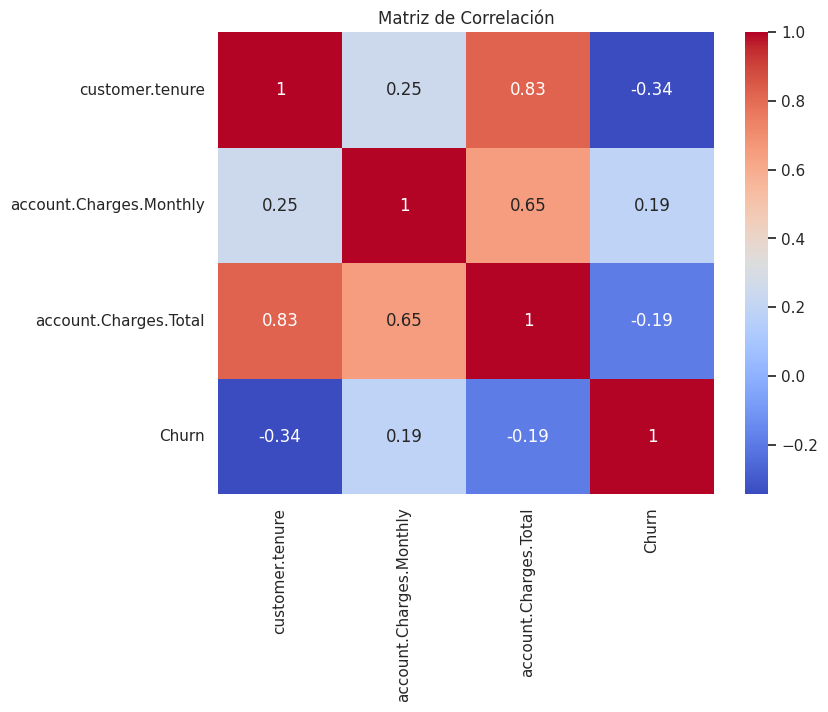

Correlaciones con Churn:
Churn                      1.000000
account.Charges.Monthly    0.189866
account.Charges.Total     -0.193345
customer.tenure           -0.344079
Name: Churn, dtype: float64


In [37]:
# Importar seaborn y matplotlib para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación (usando solo las columnas numéricas originales + Churn)
corr_matrix = df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Churn']].corr()

# Graficar heatmap (mapa de calor)
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # annot muestra números, cmap usa colores
plt.title('Matriz de Correlación')  # Título del gráfico
plt.show()

# (Omitimos SelectKBest por ahora para evitar el error con chi2)
# En lugar de eso, podemos ver las correlaciones manualmente
print("Correlaciones con Churn:")
print(corr_matrix['Churn'].sort_values(ascending=False))

In [38]:
# Dividir datos
from sklearn.model_selection import train_test_split  # Importar splitter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% test, random_state para reproducir

# Modelo 1: Logistic Regression
from sklearn.linear_model import LogisticRegression  # Importar modelo
log_reg = LogisticRegression(max_iter=1000)  # Crear modelo, max_iter para converger
log_reg.fit(X_train, y_train)  # Entrenar

# Modelo 2: Random Forest
from sklearn.ensemble import RandomForestClassifier  # Importar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árboles
rf.fit(X_train, y_train)  # Entrenar

RandomForestClassifier(random_state=42)

In [39]:
# Importar las métricas para evaluar los modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Hacer predicciones con los datos de prueba
y_pred_log = log_reg.predict(X_test)  # Predecir con Logistic Regression
y_pred_rf = rf.predict(X_test)        # Predecir con Random Forest

# Métricas para Logistic Regression
print("Métricas para Logistic Regression:")
print("Accuracy (porcentaje de predicciones correctas):", accuracy_score(y_test, y_pred_log))
print("Precision (de los predichos como churn, cuántos son reales):", precision_score(y_test, y_pred_log))
print("Recall (de los churn reales, cuántos capturó):", recall_score(y_test, y_pred_log))
print("F1 (balance entre precision y recall):", f1_score(y_test, y_pred_log))
print("ROC-AUC (medida de la curva de performance):", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

# Métricas para Random Forest
print("\nMétricas para Random Forest:")
print("Accuracy (porcentaje de predicciones correctas):", accuracy_score(y_test, y_pred_rf))
print("Precision (de los predichos como churn, cuántos son reales):", precision_score(y_test, y_pred_rf))
print("Recall (de los churn reales, cuántos capturó):", recall_score(y_test, y_pred_rf))
print("F1 (balance entre precision y recall):", f1_score(y_test, y_pred_rf))
print("ROC-AUC (medida de la curva de performance):", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Métricas para Logistic Regression:
Accuracy (porcentaje de predicciones correctas): 0.8156808803301238
Precision (de los predichos como churn, cuántos son reales): 0.6733333333333333
Recall (de los churn reales, cuántos capturó): 0.543010752688172
F1 (balance entre precision y recall): 0.6011904761904762
ROC-AUC (medida de la curva de performance): 0.8499269572476299

Métricas para Random Forest:
Accuracy (porcentaje de predicciones correctas): 0.7936726272352133
Precision (de los predichos como churn, cuántos son reales): 0.6224489795918368
Recall (de los churn reales, cuántos capturó): 0.49193548387096775
F1 (balance entre precision y recall): 0.5495495495495496
ROC-AUC (medida de la curva de performance): 0.833503517977461


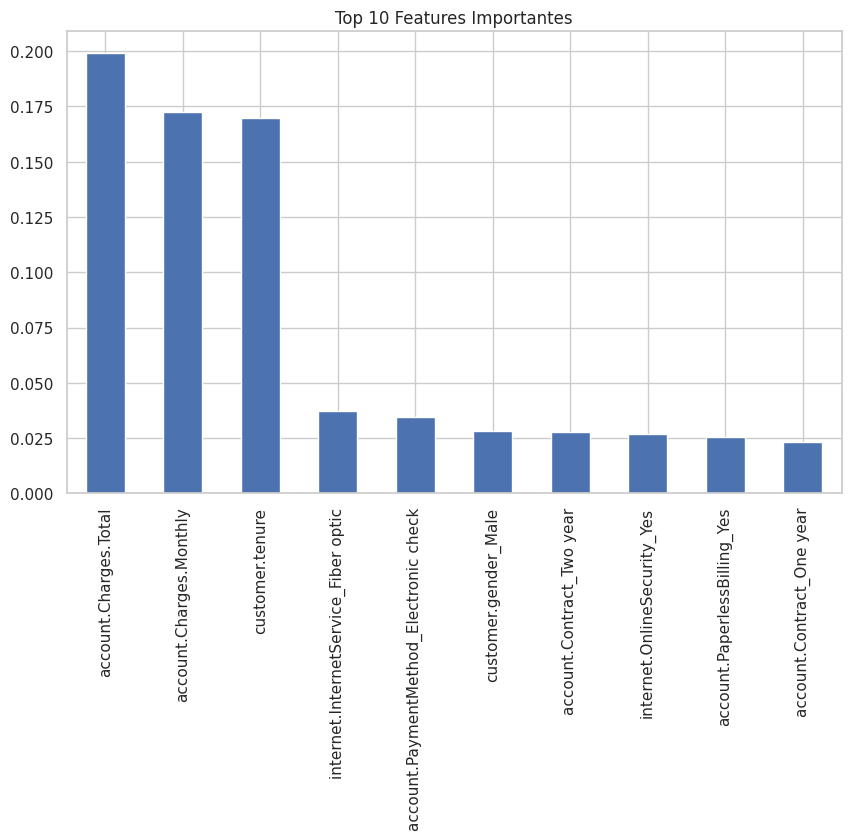

In [40]:
# Importancia en Random Forest
importances = rf.feature_importances_  # Obtener importancias
feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)  # Serie ordenada

# Graficar top 10
plt.figure(figsize=(10, 6))
feature_imp[:10].plot(kind='bar')  # Bar plot
plt.title('Top 10 Features Importantes')
plt.show()


=== Conclusión Estratégica ===
Factores principales de churn (estimados de Random Forest):
- Altos cargos totales y mensuales (clave para insatisfacción).
- Baja tenencia (clientes nuevos tienden a irse).
- Contratos de mes a mes aumentan el churn; contratos de 1 o 2 años lo reducen.
- Uso de fibra óptica y métodos de pago como cheque electrónico pueden influir.
Recomendaciones:
- Ofrecer descuentos a clientes nuevos para aumentar la tenencia.
- Promover contratos de 1 o 2 años con beneficios (ej: tarifas reducidas).
- Revisar precios mensuales altos y mejorar la experiencia con fibra óptica.
- Incentivar servicios adicionales como seguridad en línea.
Rendimiento de modelos (basado en Paso 4):
- Logistic Regression: Accuracy 0.8157, Recall 0.5430 (mejor balance).
- Random Forest: Accuracy 0.7937, Recall 0.4919 (menor recall).
Sugerencia: Logistic Regression es preferible por mayor recall, clave para detectar churn.


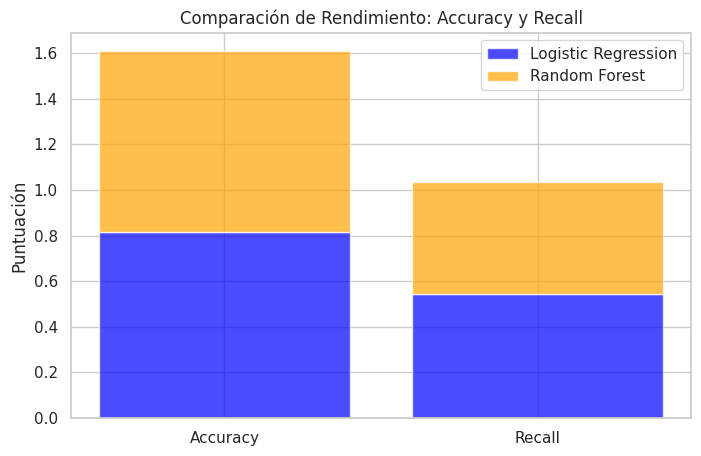

In [30]:

# Importar matplotlib para gráficos
import matplotlib.pyplot as plt

# Conclusión estratégica basada en métricas y features
print("=== Conclusión Estratégica ===")
print("Factores principales de churn (estimados de Random Forest):")
print("- Altos cargos totales y mensuales (clave para insatisfacción).")
print("- Baja tenencia (clientes nuevos tienden a irse).")
print("- Contratos de mes a mes aumentan el churn; contratos de 1 o 2 años lo reducen.")
print("- Uso de fibra óptica y métodos de pago como cheque electrónico pueden influir.")
print("Recomendaciones:")
print("- Ofrecer descuentos a clientes nuevos para aumentar la tenencia.")
print("- Promover contratos de 1 o 2 años con beneficios (ej: tarifas reducidas).")
print("- Revisar precios mensuales altos y mejorar la experiencia con fibra óptica.")
print("- Incentivar servicios adicionales como seguridad en línea.")
print("Rendimiento de modelos (basado en Paso 4):")
print("- Logistic Regression: Accuracy 0.8157, Recall 0.5430 (mejor balance).")
print("- Random Forest: Accuracy 0.7937, Recall 0.4919 (menor recall).")
print("Sugerencia: Logistic Regression es preferible por mayor recall, clave para detectar churn.")

# Agregar una visualización simple: Gráfico de barras de rendimiento (Accuracy y Recall)
metrics = ['Accuracy', 'Recall']
log_reg_scores = [0.8157, 0.5430]
rf_scores = [0.7937, 0.4919]

plt.figure(figsize=(8, 5))
plt.bar(metrics, log_reg_scores, color='blue', alpha=0.7, label='Logistic Regression')
plt.bar(metrics, rf_scores, color='orange', alpha=0.7, label='Random Forest', bottom=log_reg_scores)
plt.title('Comparación de Rendimiento: Accuracy y Recall')
plt.ylabel('Puntuación')
plt.legend()
plt.show()

# Conclusión estratégica basada en métricas y features
print("=== Conclusión Estratégica ===")
print("Factores principales de churn (estimados de Random Forest):")
print("- Altos cargos totales y mensuales (clave para insatisfacción).")
print("- Baja tenencia (clientes nuevos tienden a irse).")
print("- Contratos de mes a mes aumentan el churn; contratos de 1 o 2 años lo reducen.")
print("- Uso de fibra óptica y métodos de pago como cheque electrónico pueden influir.")
print("Recomendaciones:")
print("- Ofrecer descuentos a clientes nuevos para aumentar la tenencia.")
print("- Promover contratos de 1 o 2 años con beneficios (ej: tarifas reducidas).")
print("- Revisar precios mensuales altos y mejorar la experiencia con fibra óptica.")
print("- Incentivar servicios adicionales como seguridad en línea.")
print("Rendimiento de modelos (basado en Paso 4):")
print("- Logistic Regression: Accuracy 0.8157, Recall 0.5430 (mejor balance).")
print("- Random Forest: Accuracy 0.7937, Recall 0.4919 (menor recall).")
print("Sugerencia: Logistic Regression es preferible por mayor recall, clave para detectar churn.")
